# IMPORT LIBRARIES

In [1]:
import numpy
import pandas 
import keras
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import seaborn as sns
%matplotlib inline
import warnings as wr
wr.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# LOAD DATASET

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


# EDA(EXPLORATRY DATA ANALYSIS)

## DATA VISUALIZATION

<AxesSubplot:>

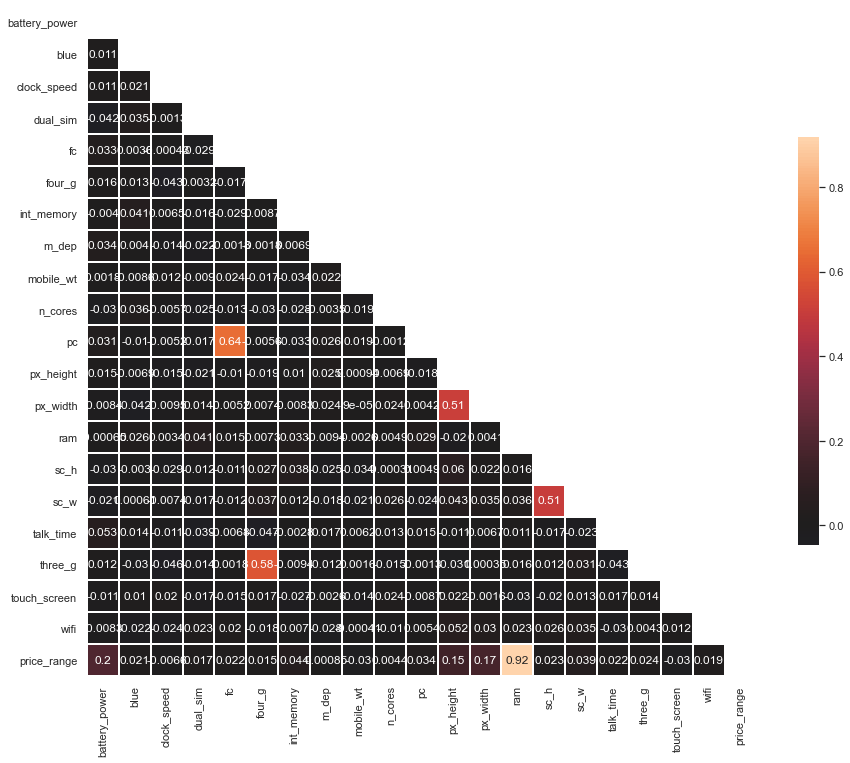

In [10]:
sns.set_theme(style="white")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20)

sns.heatmap(corr, mask=mask, center=0, annot=True,
            square=True, linewidths=.3,cbar_kws={"shrink": 0.5}) 

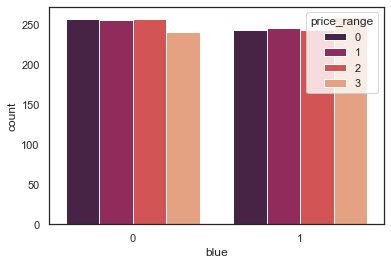

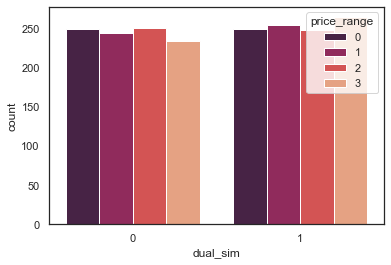

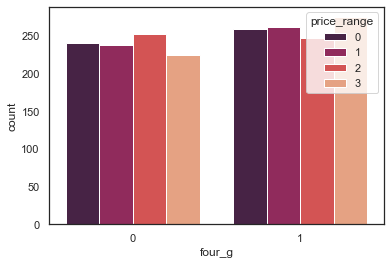

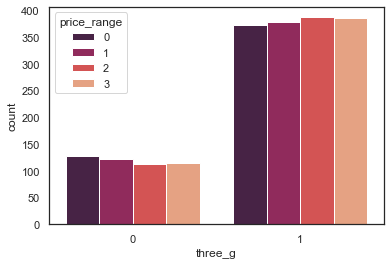

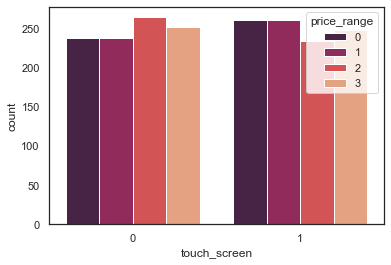

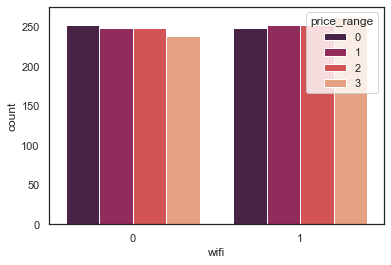

In [11]:
binary_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for i in binary_col:
    ax = sns.countplot(x=i, hue='price_range',data=df,palette='rocket')
    plt.show()

<AxesSubplot:>

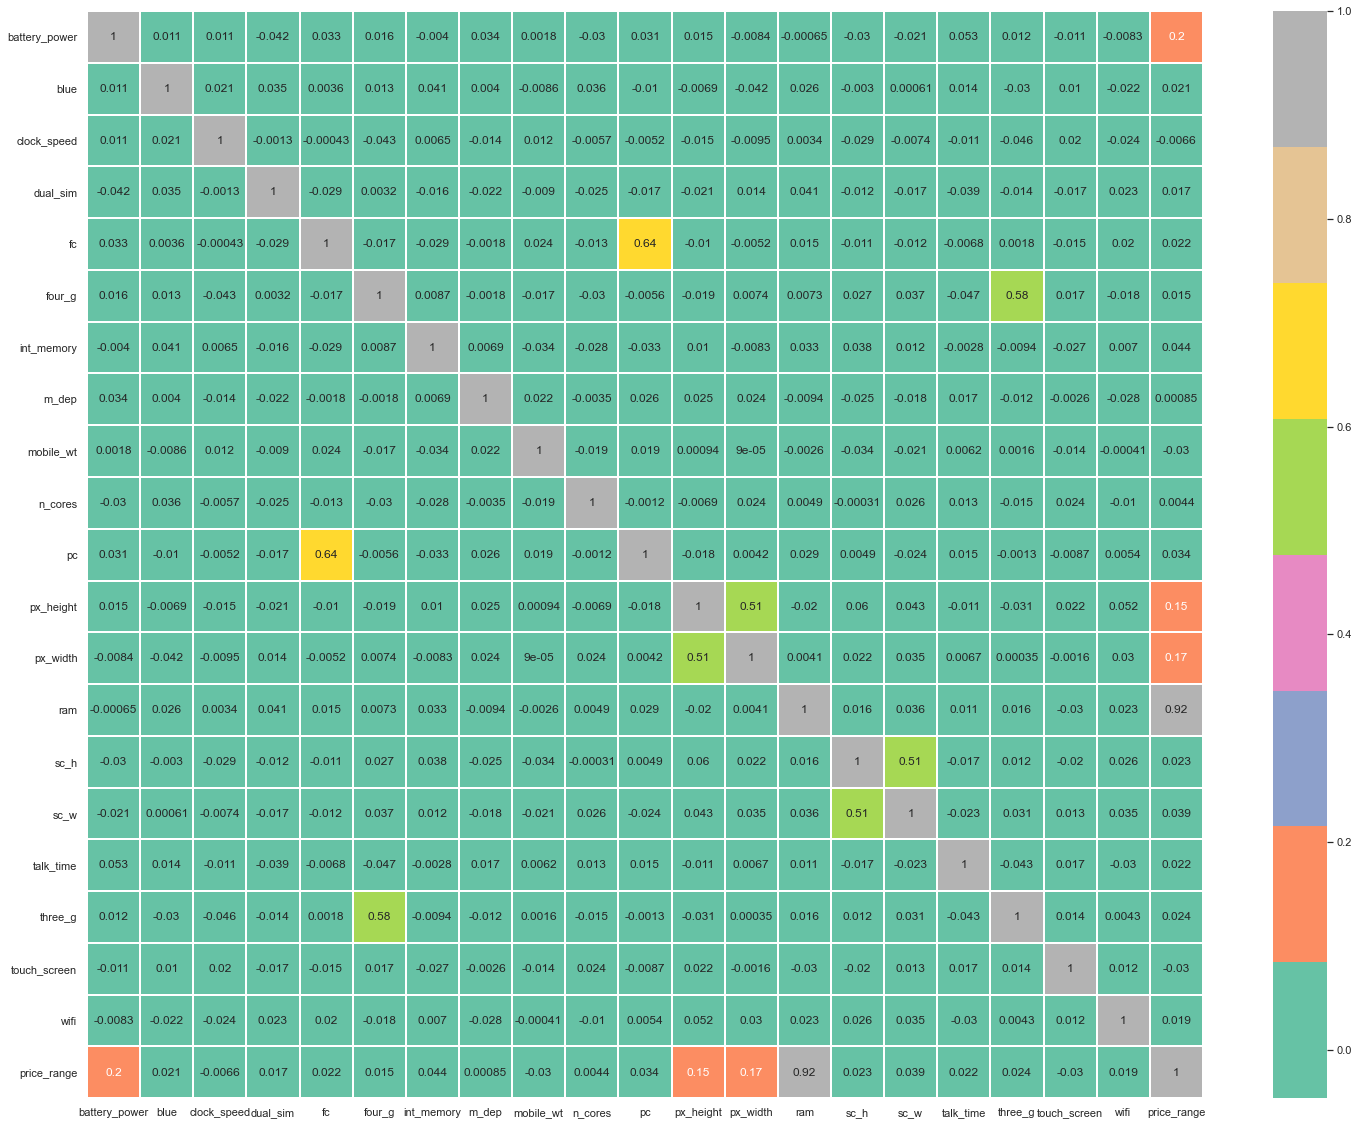

In [12]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap = 'Set2',linewidths=2)

<Figure size 864x576 with 0 Axes>

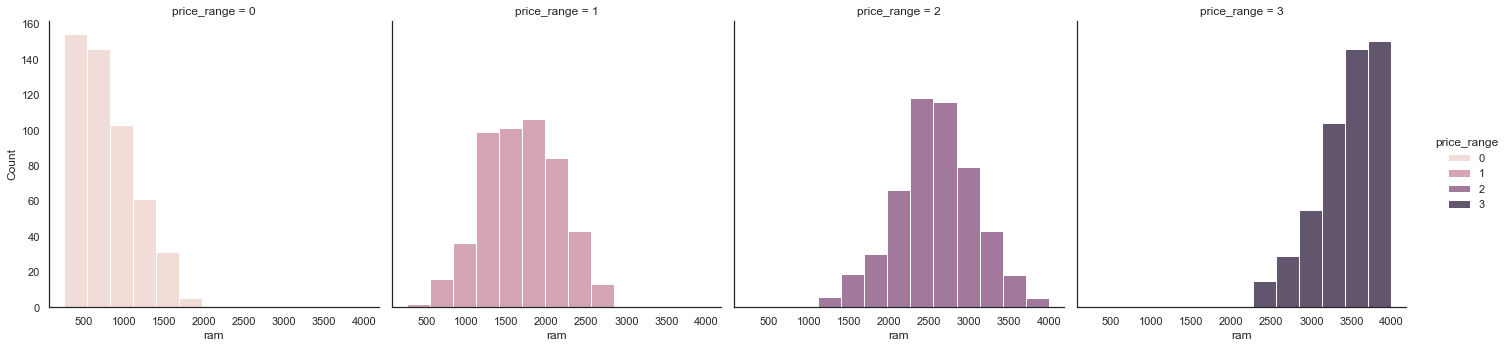

In [13]:
fig = plt.figure(figsize=(12,8))
sns.displot(x='ram',hue='price_range',col = 'price_range',data=df)
plt.show()

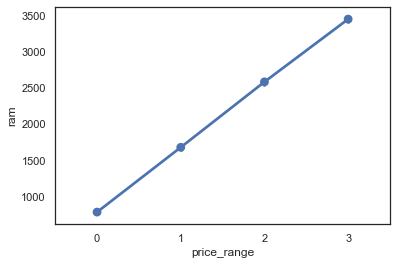

In [14]:
sns.pointplot(x='price_range',y ='ram',data=df)
plt.show()

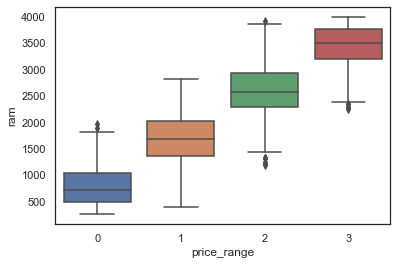

In [15]:
sns.boxplot(x='price_range',y ='ram',data = df)
plt.show()

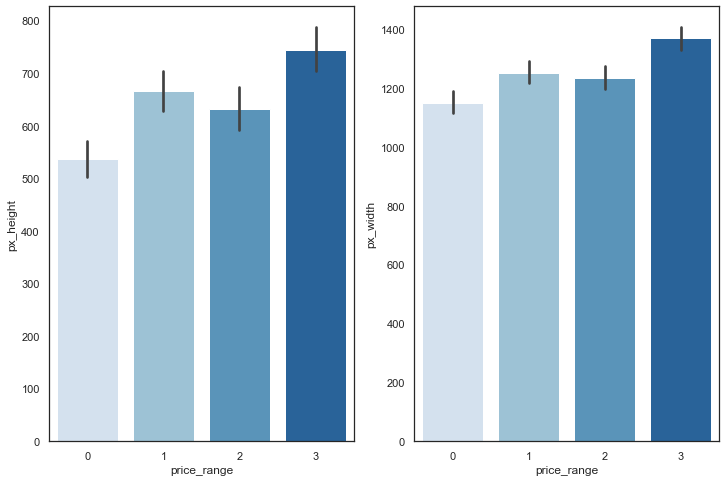

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=df,palette='Blues')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=df,palette='Blues')
plt.show()

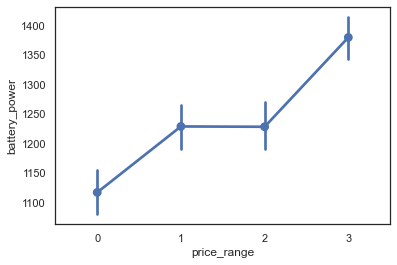

In [17]:
sns.pointplot(x='price_range',y='battery_power',data=df)
plt.show()

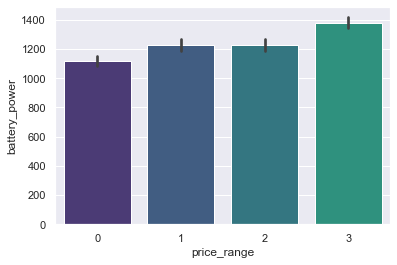

In [18]:
sns.set_style('darkgrid')
sns.set_palette('viridis')
sns.barplot(x='price_range',y='battery_power',data=df)
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

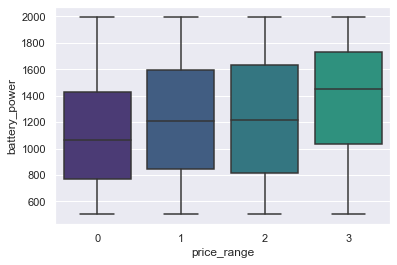

In [19]:
sns.boxplot(x='price_range',y='battery_power',data=df)

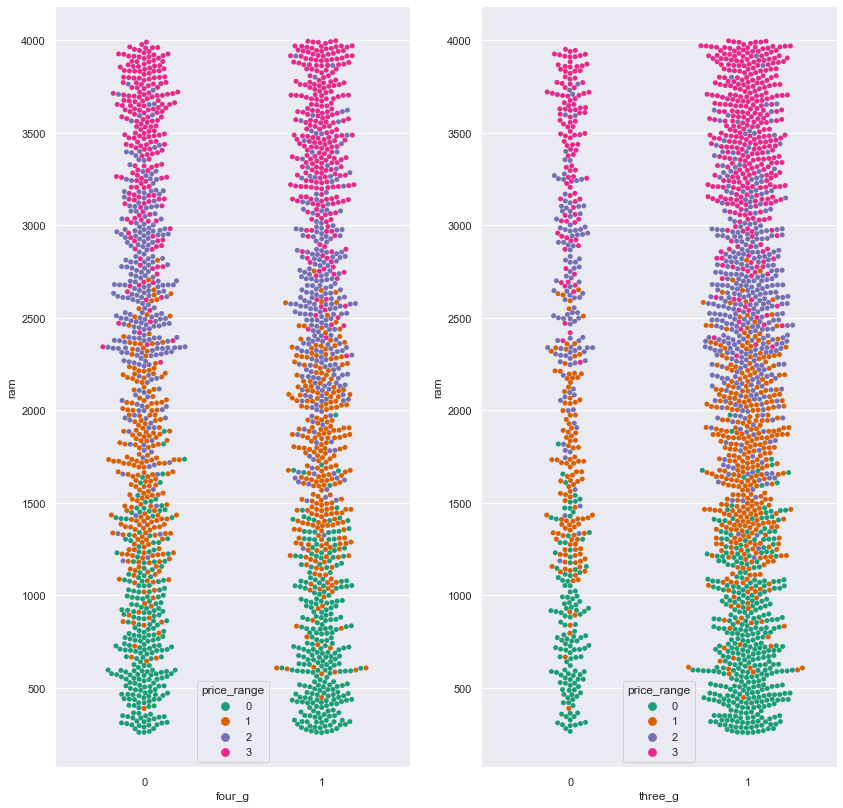

In [20]:
f, ax = plt.subplots(figsize=(14, 14))
plt.subplot(1,2,1)
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

plt.subplot(1,2,2)
ax=sns.swarmplot(x="three_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

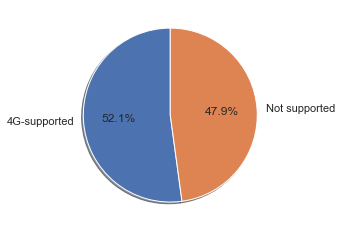

In [21]:
fig1, ax1 = plt.subplots()
columns =["4G-supported",'Not supported']
ax1.pie(df.four_g.value_counts().values, labels=columns, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

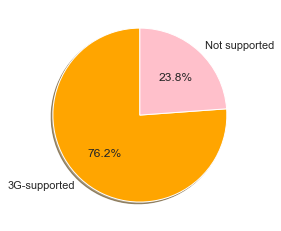

In [22]:
fig2, ax1 = plt.subplots()
columns =["3G-supported",'Not supported']
colors = ['orange', 'pink']
ax1.pie(df.three_g.value_counts().values, labels=columns, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.show()

# MODEL BUILDING

## SPLITTING DATA SET INTO TRAIN AND TEST SET

In [23]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

## KNN CLASSIFIER

In [25]:
parameters = {'n_neighbors':np.arange(1,20,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [26]:
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [27]:
y_pred=knn.predict(x_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_pred,y_test))
print("\nTest Set Accuracy:"+str(accuracy_score(y_pred,y_test)*100))


Confusion Matrix:
[[148   6   0   0]
 [  3 141   6   0]
 [  0   7 134   5]
 [  0   0   8 142]]

Test Set Accuracy:94.16666666666667


In [28]:
knn_acc=accuracy_score(y_pred,y_test)
knn_acc

0.9416666666666667

## SVM

In [29]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [30]:
y_pred=svc.predict(x_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_pred,y_test))
print("\nTest Set Accuracy:"+str(accuracy_score(y_pred,y_test)*100))


Confusion Matrix:
[[148   5   0   0]
 [  3 143   3   0]
 [  0   6 138   0]
 [  0   0   7 147]]

Test Set Accuracy:96.0


In [31]:
svc_acc=accuracy_score(y_pred,y_test)
svc_acc

0.96

## XGBOOST CLASSIFIER

In [32]:
parameters = {#'booster':'gbtree',
              'learning_rate':[0.1,0.2,0.3],
              'max_depth':[3,4,5],
              'n_estimators':[5,8,10],
              'gamma':[3,4,5]}
xgb=XGBClassifier()
clf = GridSearchCV(xgb, parameters)
clf.fit(x_train,y_train,eval_metric='rmse')

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [33]:
xgb = XGBClassifier(**clf.best_params_)
xgb.fit(x_train,y_train,eval_metric='rmse')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
y_pred=xgb.predict(x_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_pred,y_test))
print("\nTest Set Accuracy:"+str(accuracy_score(y_pred,y_test)*100))


Confusion Matrix:
[[141  11   0   0]
 [ 10 126  11   0]
 [  0  17 123   9]
 [  0   0  14 138]]

Test Set Accuracy:88.0


In [35]:
xgb_acc=accuracy_score(y_pred,y_test)
xgb_acc

0.88

## GRADIENT BOOSTING CLASSIFIER

In [36]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [37]:
y_pred=gbc.predict(x_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_pred,y_test))
print("\nTest Set Accuracy:"+str(accuracy_score(y_pred,y_test)*100))


Confusion Matrix:
[[146  10   0   0]
 [  5 128   8   0]
 [  0  16 135   8]
 [  0   0   5 139]]

Test Set Accuracy:91.33333333333333


In [38]:
gbc_acc=accuracy_score(y_pred,y_test)
gbc_acc

0.9133333333333333

## ADABOOSTING CLASSIFIER

In [39]:
parameters = {'learning_rate':[0.01,0.1,1,10],
              'n_estimators':[50,80,100,120,150,180],
              'algorithm':['SAMME', 'SAMME.R']}
abc=AdaBoostClassifier()
clf = GridSearchCV(abc, parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 80, 100, 120, 150, 180]})

In [40]:
abc = AdaBoostClassifier(**clf.best_params_)
abc.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=150)

In [41]:
y_pred=abc.predict(x_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_pred,y_test))
print("\nTest Set Accuracy:"+str(accuracy_score(y_pred,y_test)*100))


Confusion Matrix:
[[126  22   0   0]
 [ 25 110  28   0]
 [  0  22  75  11]
 [  0   0  45 136]]

Test Set Accuracy:74.5


In [42]:
abc_acc=accuracy_score(y_pred,y_test)
abc_acc

0.745

# SUMMARIZATION OF ALL MODELS AND VISUALIZATION OF THEIR ACCURACY

In [43]:
models = pd.DataFrame({
    'Model': ['KNN','SVC','XGBClassifier','Gradient Boosting Classifier',
              'Ada Boost Classifier'],
    'Score': [knn_acc, svc_acc, xgb_acc, gbc_acc, abc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,SVC,0.960000
0,KNN,0.941667
3,Gradient Boosting Classifier,0.913333
2,XGBClassifier,0.880000
4,Ada Boost Classifier,0.745000


<AxesSubplot:xlabel='Model', ylabel='Score'>

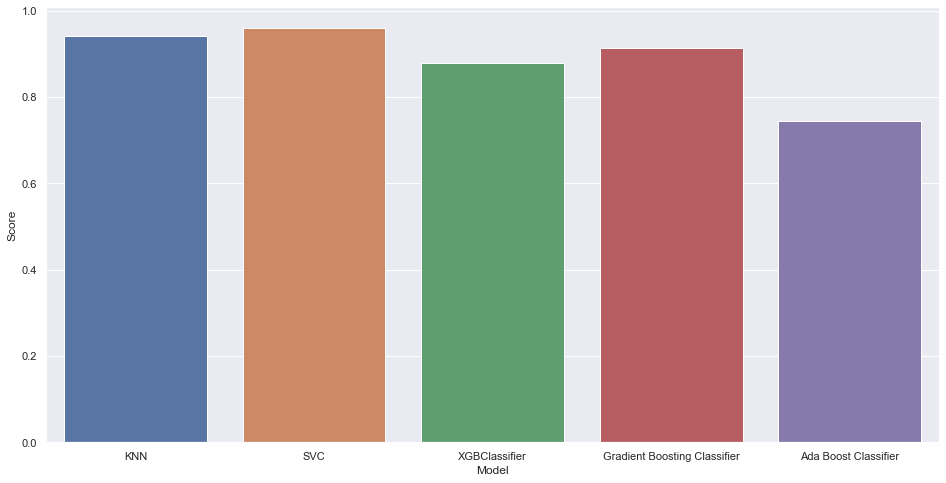

In [44]:
plt.figure(figsize=(16,8))
sns.barplot(x='Model',y='Score',data=models)

### INFERENCE:- SVC PERFORM WELL OVERALL.

# GREAT JOB!